## Import the pandas library as 'pd'

In [3]:
import pandas as pd

## Read a CSV file named "athlete_events.csv" into a DataFrame called 'olympics'

In [4]:
olympics = pd.read_csv("C:\\Users\\navya\\OneDrive - University of Massachusetts Boston\\Documents\\Courses\\Projects\\Datasets\\athlete_events.csv")

## Display information about the DataFrame 'olympics'

In [5]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Display the first few rows

In [ ]:
olympics.head()

## Count the number of missing values in each column

In [ ]:
olympics.isna().sum()

## Generate descriptive statistics

In [6]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Calculate the average age, height, and weight for each combination of 'Sex' and 'Sport'

In [9]:
avg_age = olympics.groupby(['Sex', 'Sport'])['Age'].mean()
avg_height = olympics.groupby(['Sex', 'Sport'])['Height'].mean()
avg_weight = olympics.groupby(['Sex', 'Sport'])['Weight'].mean()

def fill_missing_values(row, column, avg_values):
    if pd.isnull(row[column]):
        sex = row['Sex']
        sport = row['Sport']
        return avg_values[sex, sport]
    return row[column]

columns_to_fill = ['Age', 'Height', 'Weight']

for column in columns_to_fill:
    if column == 'Age':
        avg_values = avg_age
    elif column == 'Height':
        avg_values = avg_height
    elif column == 'Weight':
        avg_values = avg_weight

    olympics[column] = olympics.apply(fill_missing_values, args=(column, avg_values), axis=1)

olympics.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height       100
Weight       595
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Drop rows with missing values in columns 'Height' and 'Weight'

In [11]:
olympics.dropna(subset=['Height', 'Weight'], inplace=True)
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230904
dtype: int64

## Visual Analysis of Age, Height, Weight, and Top Sports Distribution

C:\Users\navya\AppData\Local\Temp\ipykernel_57640\448819301.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


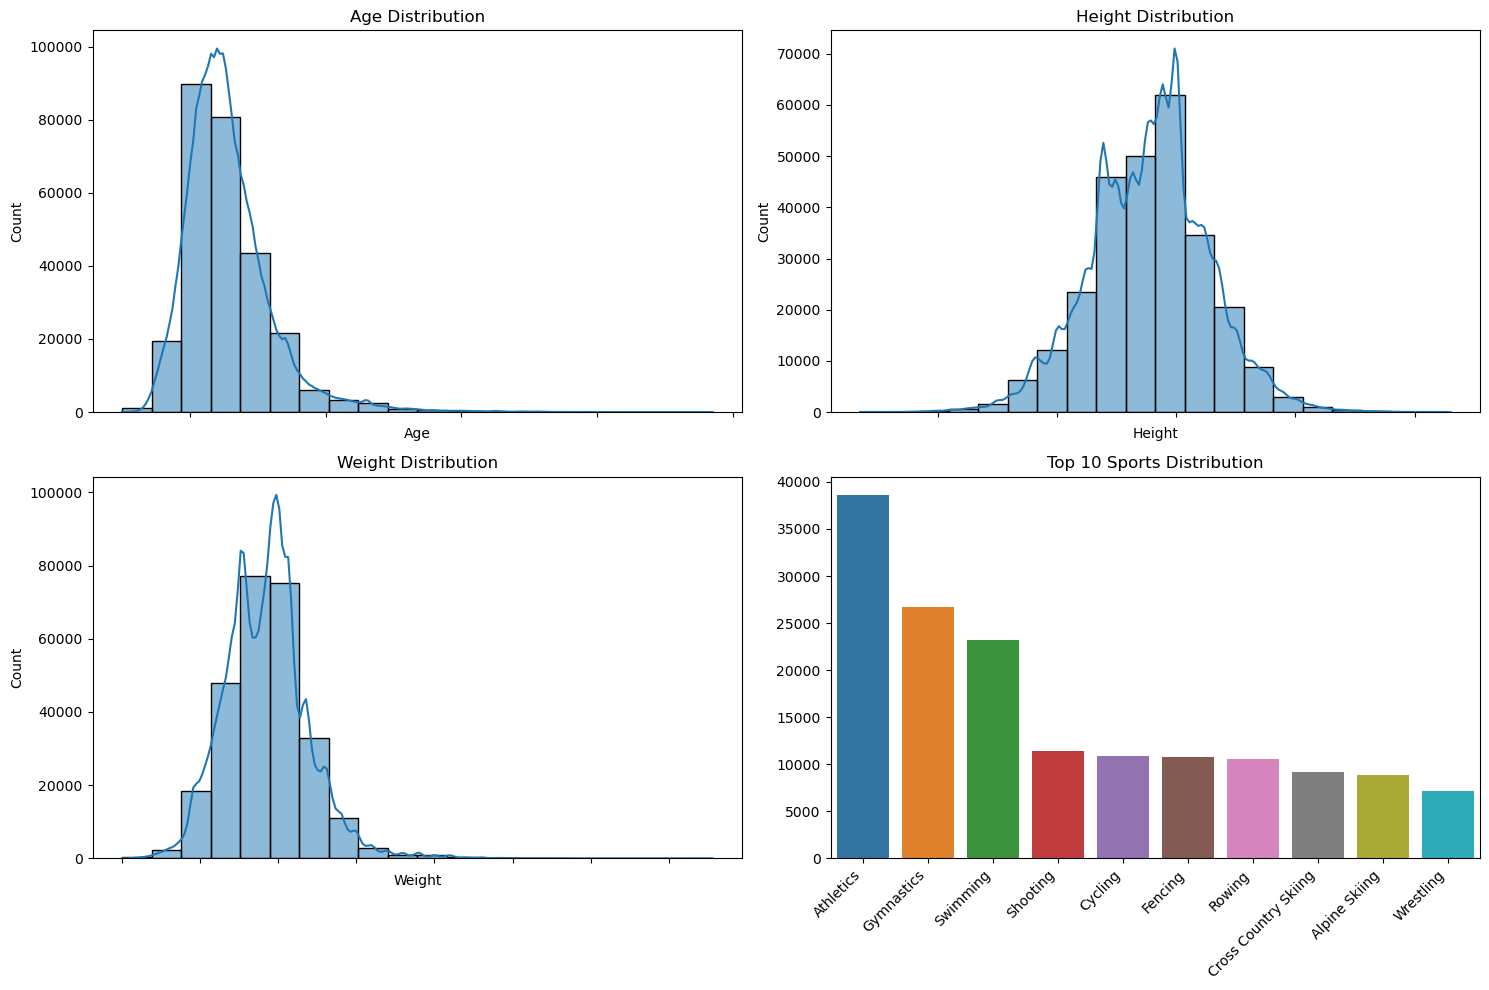

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

sns.histplot(data=olympics, x='Age', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data=olympics, x='Height', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')

top_sports = olympics['Sport'].value_counts().head(10)
sns.barplot(x=top_sports.index, y=top_sports.values, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Sports Distribution')

sns.histplot(data=olympics, x='Weight', bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Scatterplot of 'Age' vs 'Height' with points colored by 'Sex'

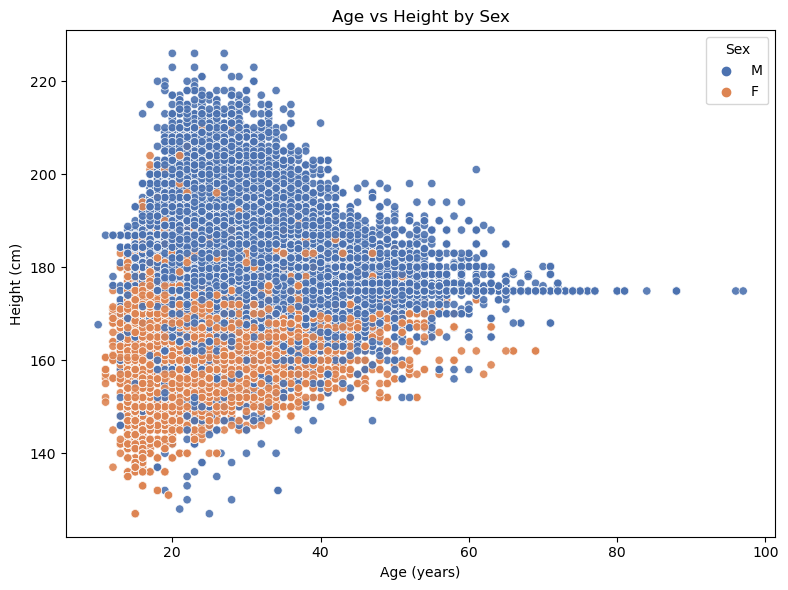

In [13]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=olympics, x='Age', y='Height', hue='Sex', palette='deep', alpha=0.9)
plt.title('Age vs Height by Sex')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')

plt.tight_layout()
plt.show()

## Scatterplot of 'Age' vs 'Weight' with points colored by 'Sex'

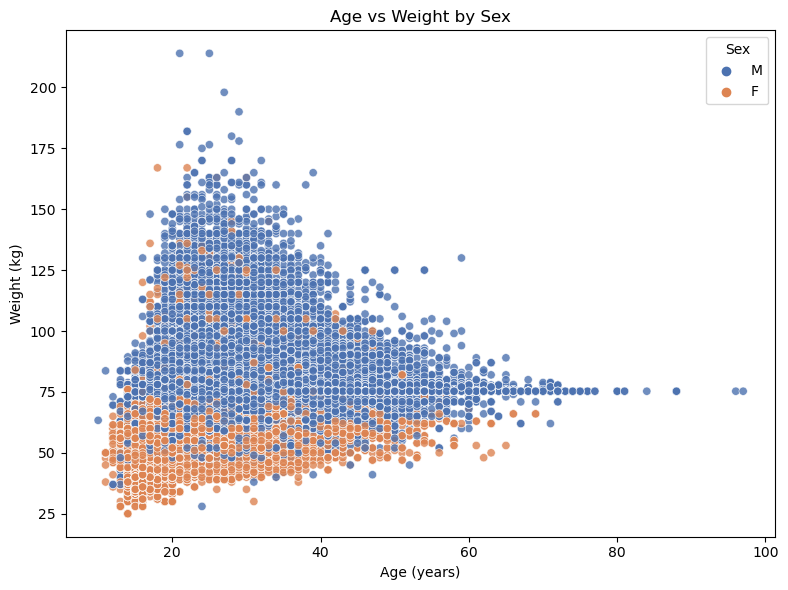

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=olympics, x='Age', y='Weight', hue='Sex', palette='deep', alpha=0.8)
plt.title('Age vs Weight by Sex')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

## Scatterplot of 'Height' vs 'Weight' with points colored by 'Sex'

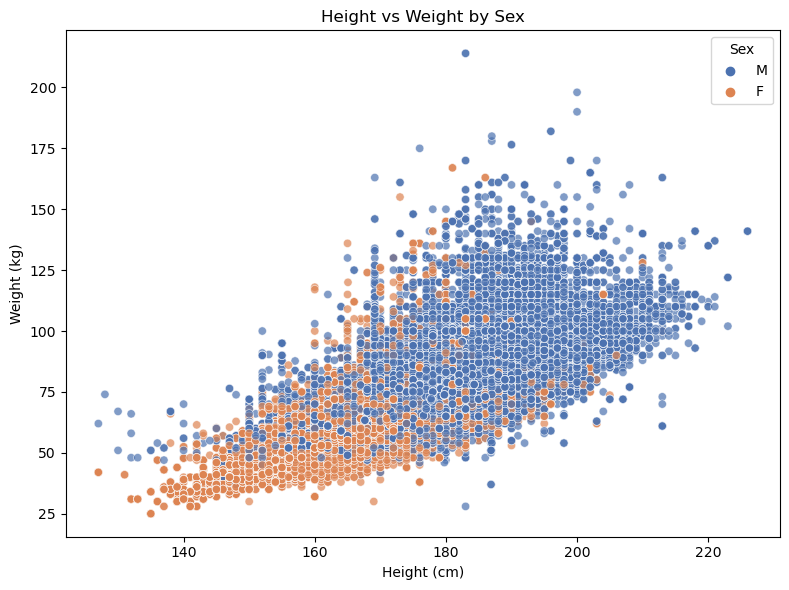

In [16]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=olympics, x='Height', y='Weight', hue='Sex', palette='deep', alpha=0.7)
plt.title('Height vs Weight by Sex')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

## Athlete Participation in Top 5 Sports Over Time

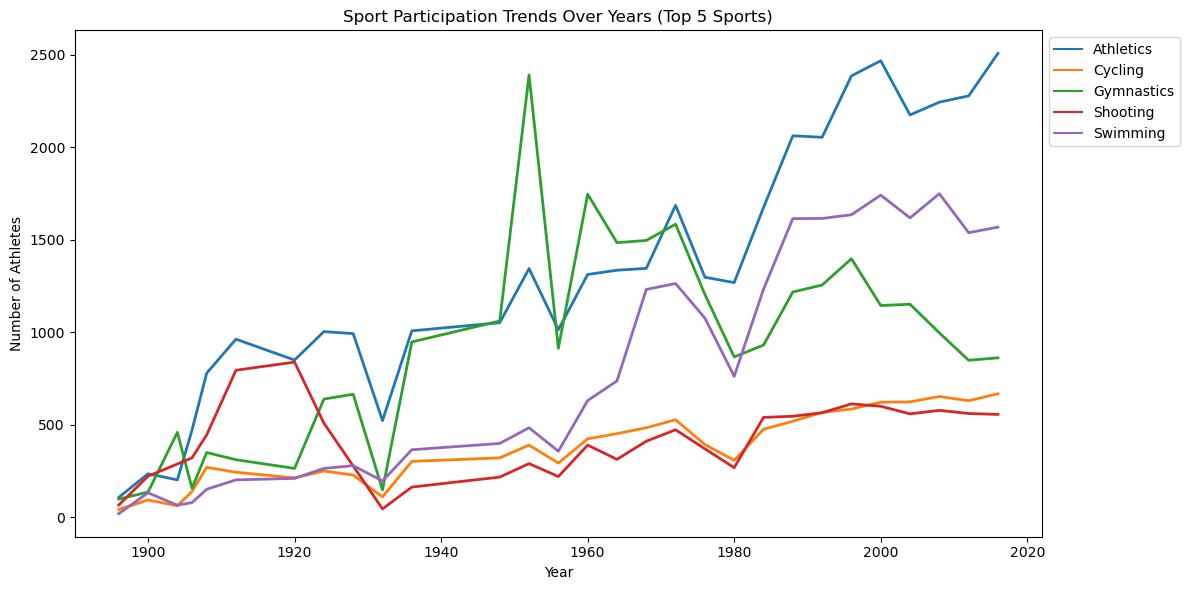

In [17]:
sport_year_counts = olympics.groupby(['Year', 'Sport'])['ID'].count().reset_index()

top_sports = sport_year_counts.groupby('Sport')['ID'].sum().nlargest(5).index
top_sport_year_counts = sport_year_counts[sport_year_counts['Sport'].isin(top_sports)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_sport_year_counts, x='Year', y='ID', hue='Sport', linewidth=2)
plt.title('Sport Participation Trends Over Years (Top 5 Sports)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Top 10 Medal-Winning Athletes

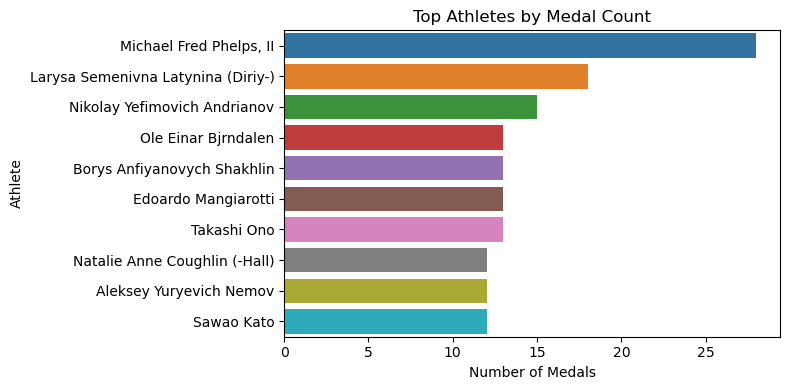

In [18]:
athlete_medal_counts = olympics.groupby(
    'Name')['Medal'].count().reset_index().sort_values(
    by='Medal', ascending=False)

top_players = athlete_medal_counts.head(10)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_players, x='Medal', y='Name')
plt.title('Top Athletes by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete')
plt.tight_layout()
plt.show()

## Age Distribution in Top 10 Sports

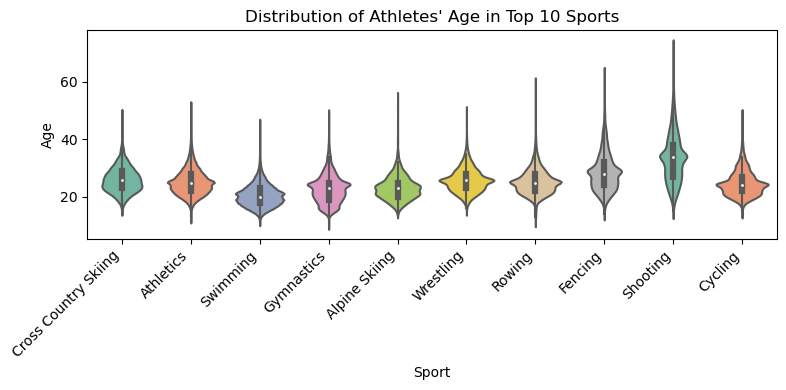

In [19]:
top_sports = olympics['Sport'].value_counts().nlargest(10).index
top_sports_data = olympics[olympics['Sport'].isin(top_sports)]

plt.figure(figsize=(8, 4))
sns.violinplot(data=top_sports_data, x='Sport', y='Age', palette='Set2')
plt.title('Distribution of Athletes\' Age in Top 10 Sports')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Gender Distribution in Top 5 Sports

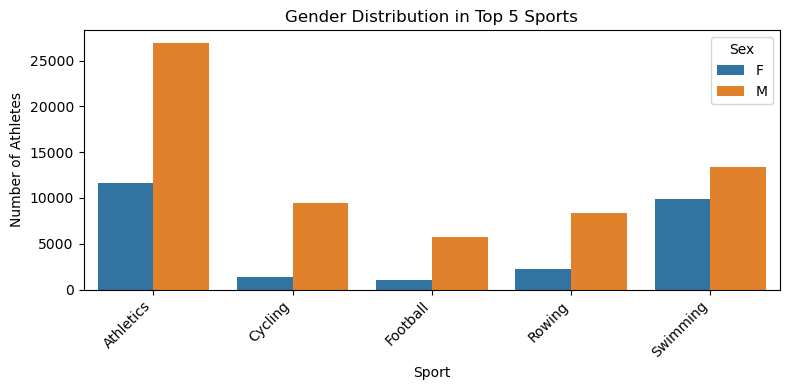

In [20]:
top_sports = olympics.drop_duplicates(subset=['Name', 'Sport'])['Sport'].value_counts().nlargest(5).index
top_sports_data = olympics[olympics['Sport'].isin(top_sports)]

gender_sport_counts = top_sports_data.groupby(['Sport', 'Sex'])['Name'].count().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=gender_sport_counts, x='Sport', y='Name', hue='Sex')
plt.title('Gender Distribution in Top 5 Sports')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Difference in Athletes between Summer and Winter Olympics

Unique Seasons: ['Summer' 'Winter']


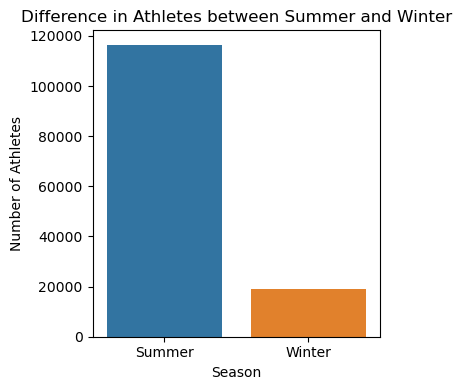

In [21]:
unique_seasons = olympics['Season'].unique()
print("Unique Seasons:", unique_seasons)

summer_athletes = olympics[olympics['Season'] == 'Summer']['ID'].nunique()
winter_athletes = olympics[olympics['Season'] == 'Winter']['ID'].nunique()
athlete_difference = summer_athletes - winter_athletes

plt.figure(figsize=(4, 4))
sns.barplot(x=['Summer', 'Winter'], y=[summer_athletes, winter_athletes])
plt.title('Difference in Athletes between Summer and Winter')
plt.xlabel('Season')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.show()

## Distribution of Age, Height, and Weight by Season

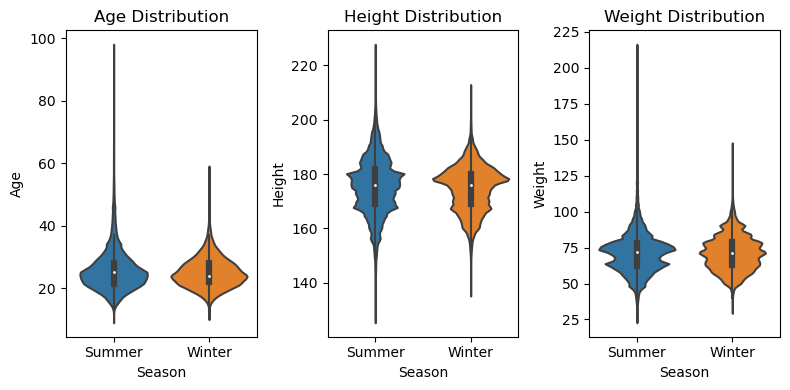

In [22]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
sns.violinplot(x='Season', y='Age', data=olympics)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.violinplot(x='Season', y='Height', data=olympics)
plt.title('Height Distribution')

plt.subplot(1, 3, 3)
sns.violinplot(x='Season', y='Weight', data=olympics)
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

## Top 10 Sports by Season in the Olympics

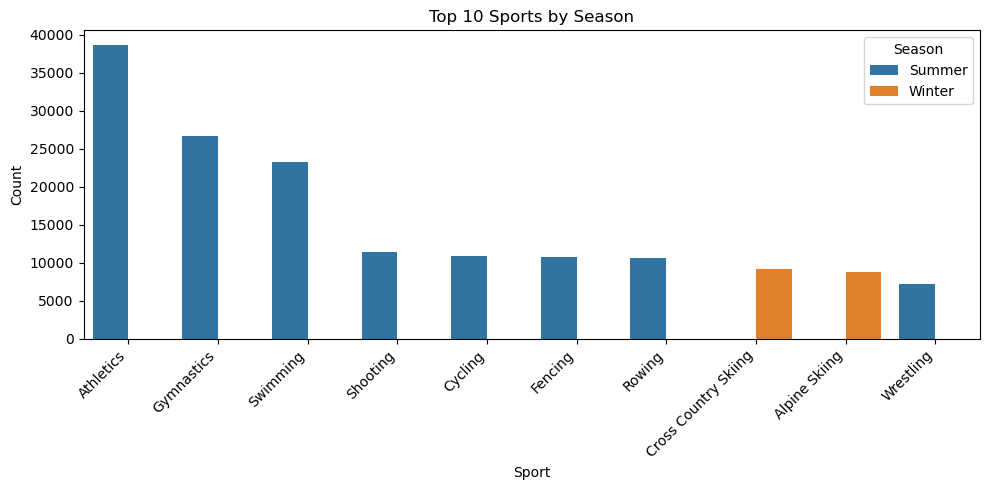

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sport', hue='Season', data=olympics, order=olympics['Sport'].value_counts().index[:10])
plt.title('Top 10 Sports by Season')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

## Unique Medal Categories in the Olympics Dataset

In [25]:
unique_medals = olympics['Medal'].unique()
unique_medals

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

## Trends in Total Medals Over the Last 10 Years

<Figure size 2400x1200 with 0 Axes>

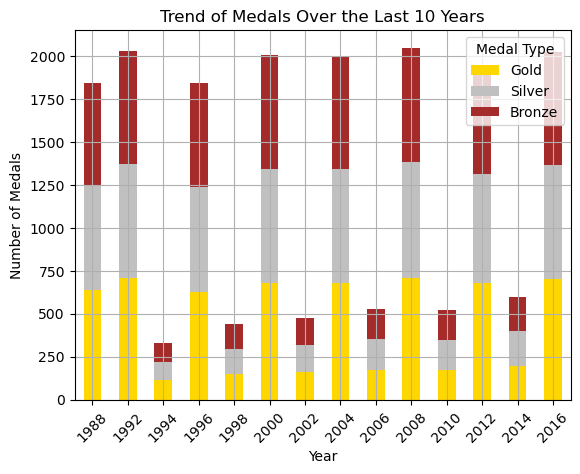

In [28]:
last_10_years = olympics[olympics['Year'] >= olympics['Year'].max() - 30]
medals_by_year_type = last_10_years.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

plt.figure(figsize=(24, 12))
medals_by_year_type.plot(kind='bar', stacked=True, color=medal_colors.values())
plt.title('Trend of Medals Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type', labels=medal_colors.keys())
plt.grid()
plt.show()

## Heatmap of Sport and Medal Relationships

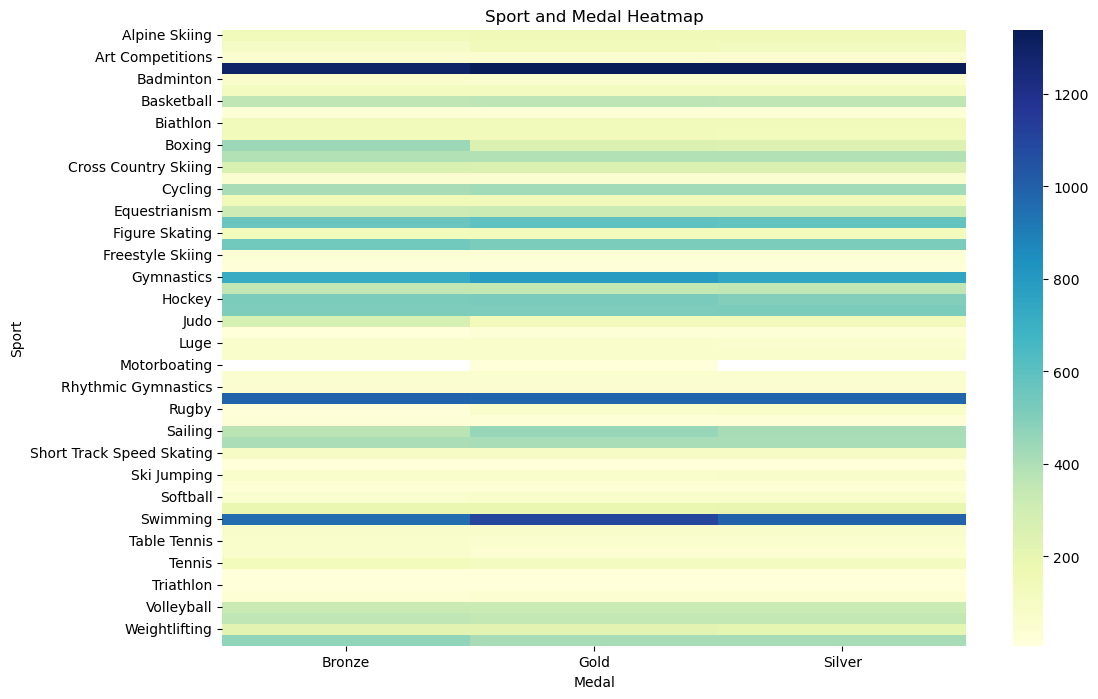

In [32]:
sport_medal_heatmap = olympics.pivot_table(index='Sport', columns='Medal', values='ID', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(sport_medal_heatmap, cmap='YlGnBu')
plt.title('Sport and Medal Heatmap')
plt.show()

## Heatmap of Sport and Gender Relationships

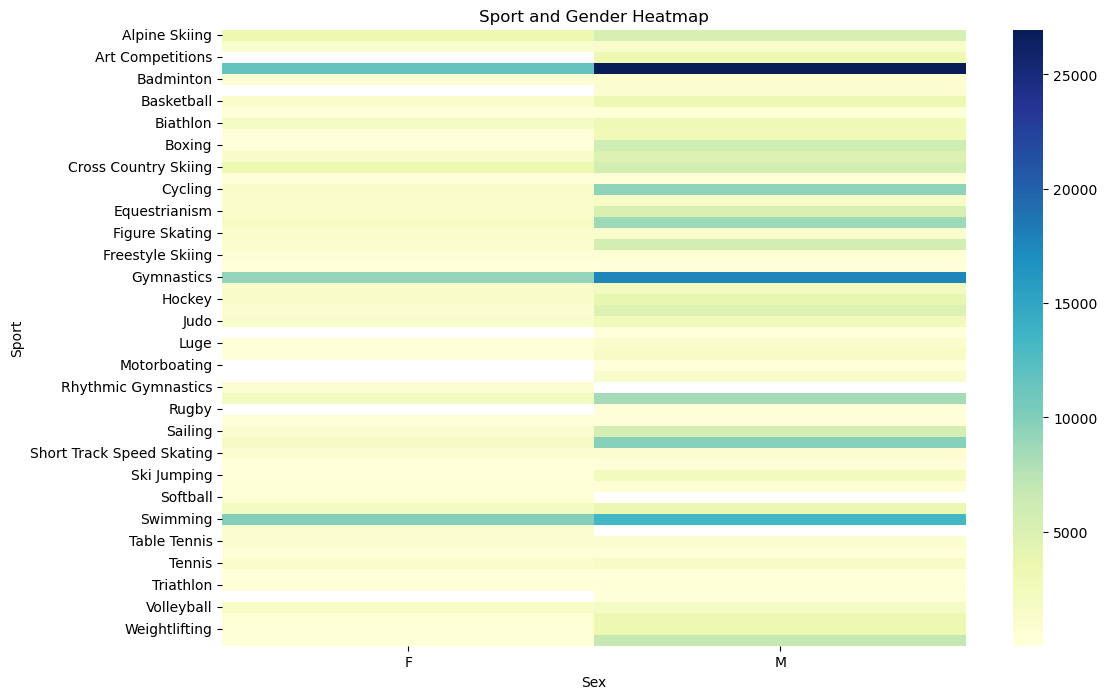

In [33]:
sport_gender_heatmap = olympics.pivot_table(index='Sport', columns='Sex', values='ID', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(sport_gender_heatmap, cmap='YlGnBu')
plt.title('Sport and Gender Heatmap')
plt.show()

## Box Plot of Athlete Age in the Olympics

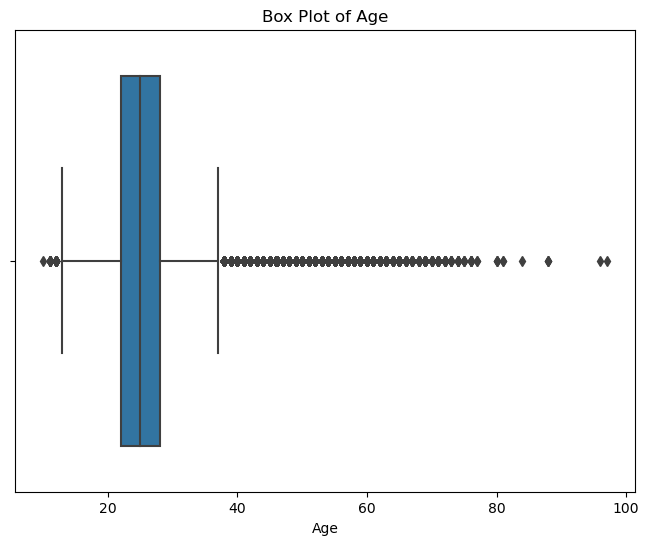

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=olympics)
plt.title('Box Plot of Age')
plt.show()

## Box Plot of Athlete Height in the Olympics

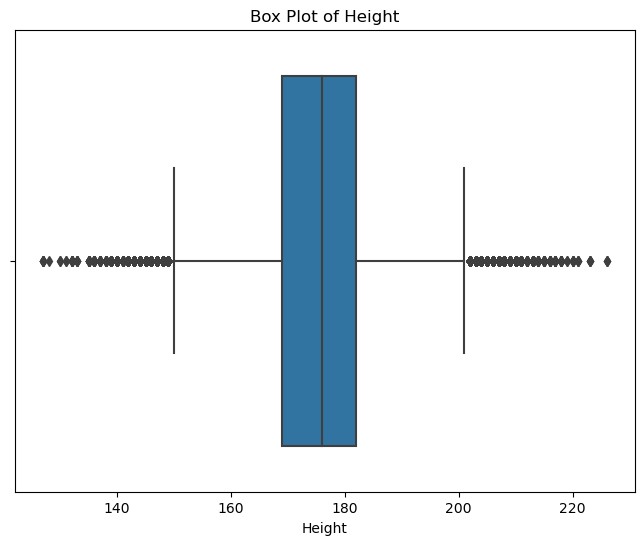

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Height', data=olympics)
plt.title('Box Plot of Height')
plt.show()

## Box Plot of Athlete Weight in the Olympics

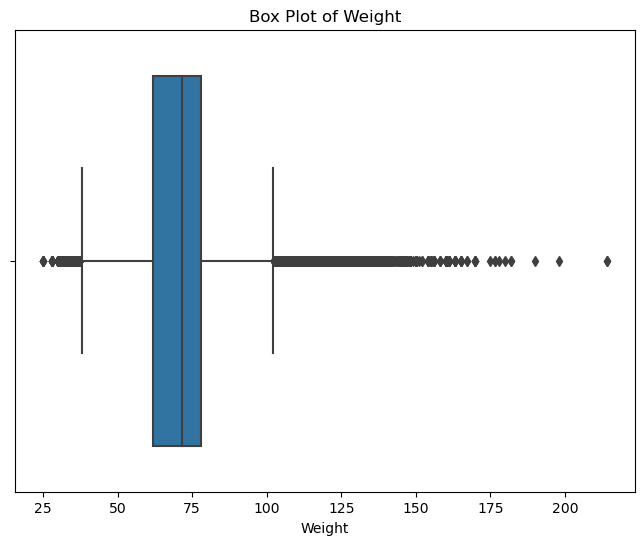

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weight', data=olympics)
plt.title('Box Plot of Weight')
plt.show()

## Top 10 Events with the Most Participants

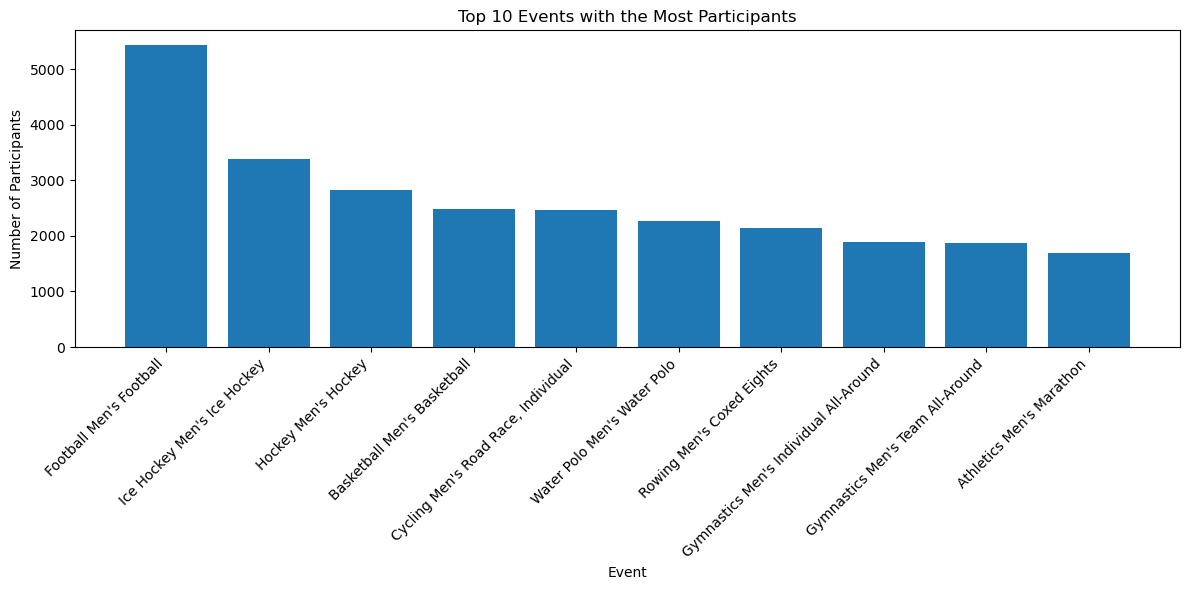

In [31]:
event_participation = olympics.groupby('Event')['ID'].nunique().reset_index()

event_participation = event_participation.sort_values(by='ID', ascending=False)

top_10_events = event_participation.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_events['Event'], top_10_events['ID'])
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.title('Top 10 Events with the Most Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 10 Countries with the Most Total and Gold Medals

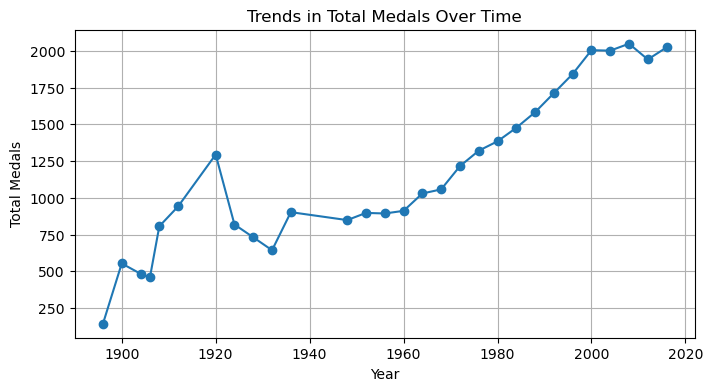

In [30]:
filtered_olympics = olympics[olympics['Season'] != 'Winter']
medals = filtered_olympics.dropna(subset=['Medal'])
country_medal_counts = medals.groupby('NOC')['Medal'].count().reset_index()
country_medal_counts = country_medal_counts.sort_values(by='Medal', ascending=False)
top_10_countries = country_medal_counts.head(10)
gold_medals = medals[medals['Medal'] == 'Gold']
gold_medal_counts = gold_medals.groupby('NOC')['Medal'].count().reset_index()
gold_medal_counts = gold_medal_counts.sort_values(by='Medal', ascending=False)
top_10_gold_countries = gold_medal_counts.head(10)
medal_counts_over_time = medals.groupby('Year')['Medal'].count()

plt.figure(figsize=(8, 4))
plt.plot(medal_counts_over_time.index, medal_counts_over_time.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Trends in Total Medals Over Time')
plt.grid(True)
plt.show()

## Most Common Words in Athlete Names

In [37]:
print("Top 10 Countries with the Most Total Medals:")
print(top_10_countries)

print("\nTop 10 Countries with the Most Gold Medals:")
print(top_10_gold_countries)

Top 10 Countries with the Most Total Medals:
     NOC  Medal
139  USA   4985
137  URS   2063
46   GBR   1919
49   GER   1776
43   FRA   1611
67   ITA   1446
6    AUS   1304
57   HUN   1122
121  SWE   1108
93   NED    917

Top 10 Countries with the Most Gold Medals:
     NOC  Medal
101  USA   2468
99   URS    832
36   GBR    610
39   GER    590
51   ITA    518
34   FRA    461
44   HUN    432
87   SWE    354
4    AUS    342
37   GDR    339


## Word Cloud of Athlete Names

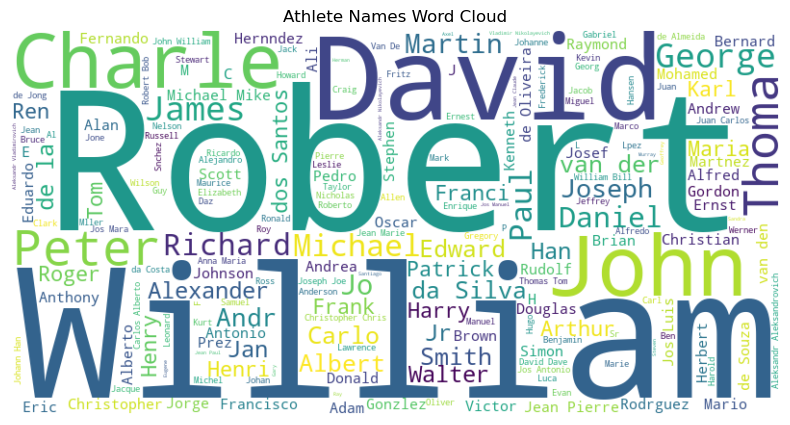

In [40]:
import nltk
from wordcloud import WordCloud

athlete_names = olympics['Name']
all_names = ' '.join(athlete_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Athlete Names Word Cloud')
plt.show()